# Merge Sort

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2017 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate

### Empirical order of growth

Sometimes we can figure out what order of growth a function belongs to by running it with a range of problem sizes and measuring the run time.

`order.py` contains functions from Appendix A we can use to estimate order of growth.

In [50]:
from order import run_timing_test, plot_timing_test

### Comparing sort algorithms

NumPy provides implementations of three sorting algorithms, quicksort, mergesort, and heapsort.

Read about each of these algorithms to see what order of growth they belong to.

Now let's see if we can characterize their asymptotic behavior.



1024 0.0
2048 0.015625
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.0
131072 0.015625
262144 0.03125
524288 0.078125
1048576 0.109375
2097152 0.265625
4194304 0.515625
8388608 1.03125


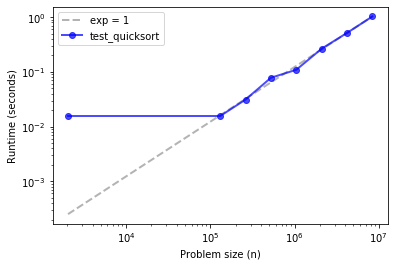

In [51]:
def test_quicksort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='quicksort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_quicksort', exp=1)

Quicksort is hard to distinguish from linear, up to about 10 million elements.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.015625
65536 0.0
131072 0.03125
262144 0.03125
524288 0.078125
1048576 0.15625
2097152 0.3125
4194304 0.671875
8388608 1.4375


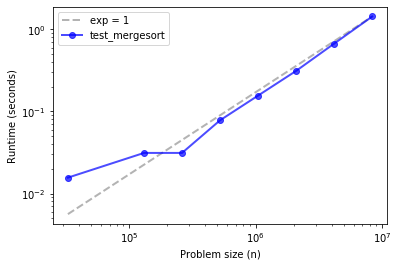

In [52]:
def test_mergesort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='mergesort')

ns, ts = run_timing_test(test_mergesort)
plot_timing_test(ns, ts, 'test_mergesort', exp=1)

Merge sort is similar, maybe with some upward curvature.

1024 0.0
2048 0.015625
4096 0.0
8192 0.0
16384 0.0
32768 0.015625
65536 0.0
131072 0.015625
262144 0.03125
524288 0.0625
1048576 0.109375
2097152 0.25
4194304 0.5
8388608 1.234375


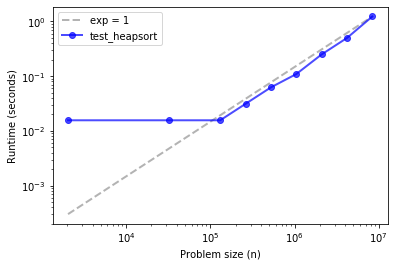

In [53]:
def test_heapsort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='heapsort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_heapsort', exp=1)

The three methods are effectively linear over this range of problem sizes.

And their run times are about the same, with quicksort being the fastest, despite being the one with the worst asympotic performance in the worst case.

### Implementing Merge Sort



In [54]:
def merge_sort_norec(xs):
    N = len(xs)
    left = xs[:N//2]
    right = xs[N//2:]
    
    left.sort()
    right.sort()
    
    return merge(left, right)

This version breaks the array in half, uses `np.sort` to sort the two halves, then uses merge to put the halves together.

**Exercise:** Write a function called `merge` that takes two sorted NumPy arrays, `left` and `right`, and returns a new array that contains all elements from `left` and `right`, sorted.  (where "sorted" means in ascending order, or non-decreasing, to be more precise).

Note: this function is not hard to write, but it is notoriously difficult to get all of the edge cases right without making the function unreadable.  Take it as a challenge to write a version that is correct, concise, and readable.

In [55]:
import time

def merge(left, right):
    """ Merges two sorted numpy arrays. 
    
        O(n+m), where n and m are the lengths of left and right.
    """
    
    new_array = np.zeros(len(left) + len(right))
    i = 0  # index in left
    j = 0  # index in right
    k = 0  # index in sorted array
    
    while k < len(new_array):
        new_element = None
        
        # If you run out of elements in right or left, use the other list
        if i == len(left):
            new_element = right[j]
            j += 1
        elif j == len(right):
            new_element = left[i]
            i += 1

        # Otherwise, take the minimum first element
        elif left[i] <= right[j]:
            new_element = left[i]
            i += 1
        else:
            new_element = right[j]
            j += 1
        
        # Advance along output array
        new_array[k] = new_element
        k += 1
        
    return new_array

In [56]:
xs = np.random.random(10000)
ys = np.random.random(10000)
xs.sort()
ys.sort()
res = merge(xs, ys)
all(sorted(res) == res)

True

**Exercise:**  Starting with `merge_sort_norec`, write a function called `merge_sort_rec` that's fully recursive; that is, instead of using `numpy.sort` to compute the DFTs of the halves, it should use `merge_sort_rec`.  Of course, you will need a base case to avoid an infinite recursion.



In [57]:
# Solution goes here
def merge_sort_rec(xs):
    
    # A list with one element is sorted
    if len(xs) == 1:
        return xs
    
    N = len(xs)
    left = xs[:N//2]
    right = xs[N//2:]
    
    left = merge_sort_rec(left)
    right = merge_sort_rec(right)
    
    return merge(left, right)

Test your method by running the code in the next cell, then use `test_merge_sort_rec`, below, to check the performance of your function.

In [58]:
xs = np.random.random(10000)

res = merge_sort_rec(xs)
all(sorted(res) == res)

True

1024 0.015625
2048 0.03125
4096 0.046875
8192 0.109375
16384 0.203125
32768 0.46875
65536 1.046875


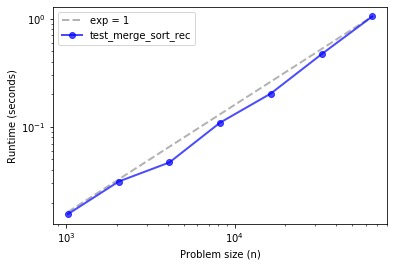

In [66]:
def test_merge_sort_rec(n):
    xs = np.random.normal(size=n)
    spectrum = merge_sort_rec(xs)

ns, ts = run_timing_test(test_merge_sort_rec)
plot_timing_test(ns, ts, 'test_merge_sort_rec', exp=1)

If things go according to plan, your implementation of merge sort should be close to linear, or a little steeper.